In [1]:
from utils import dataframeUtil
import Configurations as config
from utils import modelUtils
from utils import plotUtils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import joblib
from models import mean_threshold_model as mmt_model
from models import models_builder
from simulation import quadraticTrend
from random import randrange

Configuration report:
Number of Subgroups is: 7
The Trend Simulation Formel is: x*1.3+10
main dir: ../
quadraticTrend ist imported... Globale Setting will be changed


In [3]:
print(len(models_builder.test_y[0]))

7


In [2]:
models_builder.createModels_for_classification_quadraticTrend()

number of Target Variable is 7
Epoch 1/30
438/438 [==============================] - 1s 1ms/step - loss: 0.0470 - accuracy: 0.9546 - val_loss: 0.0090 - val_accuracy: 0.9913
Epoch 2/30
438/438 [==============================] - 0s 832us/step - loss: 0.0061 - accuracy: 0.9950 - val_loss: 0.0073 - val_accuracy: 0.9936
Epoch 3/30
438/438 [==============================] - 0s 845us/step - loss: 0.0038 - accuracy: 0.9967 - val_loss: 0.0057 - val_accuracy: 0.9934
Epoch 4/30
438/438 [==============================] - 0s 829us/step - loss: 0.0015 - accuracy: 0.9987 - val_loss: 0.0031 - val_accuracy: 0.9963
Epoch 5/30
438/438 [==============================] - 0s 826us/step - loss: 0.0017 - accuracy: 0.9983 - val_loss: 0.0041 - val_accuracy: 0.9956
Epoch 6/30
438/438 [==============================] - 0s 836us/step - loss: 5.0072e-04 - accuracy: 0.9999 - val_loss: 0.0034 - val_accuracy: 0.9961
Epoch 7/30
438/438 [==============================] - 0s 854us/step - loss: 2.4404e-04 - accuracy: 1.00

In [4]:
# for Classification with 4*7 points
# Import Dataset
print(config.testDatasetNameQuadratic,config.neuralInputsNumber,config.numberOftargetVariables)
suffix = config.model_suffix_classification_quadraticTrend
x_test,y_test = dataframeUtil.getDataset(config.testDatasetNameQuadratic,config.neuralInputsNumber,config.numberOftargetVariables)
# load models
dnn_model=keras.models.load_model(config.model_output_path+suffix+'/dnn_model_'+suffix+'.h5')
rf_model = joblib.load(config.model_output_path+suffix+'/random_forest_'+suffix+'.joblib')
svm_model = joblib.load(open(config.model_output_path+suffix+'/svm_model_'+suffix+'.sav', 'rb'))

# do prediction
y_dnn_pred=dnn_model.predict(x_test)
y_rf_pred=rf_model.predict(x_test)
y_svm_pred=modelUtils.transform_y_to_binary(svm_model.predict(x_test))

#suffix=""
push=0
path="scores/qudratic/"

dataset/Quadratic/testdata.csv 28 7


In [4]:
# for Predection with 4 points

# Import Dataset
DataPoinstsNumber = 4
x_test,y_test = dataframeUtil.getDataset(config.testDatasetName,config.neuralInputsNumber,config.numberOftargetVariables)
x_test = x_test[:,0:DataPoinstsNumber]
neuralInputsNumber = DataPoinstsNumber
targetVarNumber = config.numberOftargetVariables
# load models
suffix ="prediction"
dnn_model=keras.models.load_model(config.model_output_path+suffix+'/dnn_model_'+suffix)
rf_model = joblib.load(config.model_output_path+suffix+'/random_forest_'+suffix+'.joblib')
svm_model = joblib.load(open(config.model_output_path+suffix+'/svm_model_'+suffix+'.sav', 'rb'))
# prediction
y_dnn_pred=dnn_model.predict(x_test)
y_rf_pred=rf_model.predict(x_test)
y_svm_pred=modelUtils.transform_y_to_binary(svm_model.predict(x_test))
y_mmt_pred = mmt_model.predict(x_test)
suffix="Pred_"
push=0.1
path="scores/4points/"

In [5]:
def getConfusionMatix(y_pred, y_test, path,modelName):
    accurancy, confusionMatrix, report = modelUtils.getMetric(y_pred, y_test)
    cm = np.asanyarray(confusionMatrix)
    df = pd.DataFrame(cm, columns=config.labels)
    df.index = config.labels
    df.to_excel(path+suffix+"confusionMatrix_"+modelName+".xls")
    return df

def getConfusionMatix_multy_classes(y_pred, y_test,path, modelName):
    FP, FN, TP, TN = modelUtils.get_fb_fn_tp_tn(y_pred, y_test)
    dic = {
        "FP": FP, "FN": FN, "TP": TP, "TN": TN
    }
    df = pd.DataFrame(dic)
    df.index = config.labels
    precision, recall, fscore, accuracy = modelUtils.calculateScores(
        y_pred, y_test)
    df["Precision"] = precision
    df["Recall"] = recall
    df["FScore"] = fscore
    df["Accuracy"] = accuracy
    df.loc['Average'] = df.mean()
    df.to_excel(path+suffix+"confusionMatrix_Multy_"+modelName+".xls")
    return df


In [15]:
# tests
plotUtils.figsize=15
accurancy, confusionMatrix, report = modelUtils.getMetric(y_dnn_pred, y_test)
print(confusionMatrix)
print("lenth of input: ",len(x_test[0]))
print("lenth of output: ",len( y_test[0]))

a = randrange(0,len(x_test))
index = np.argmax(y_test[a])
test= y_dnn_pred=dnn_model.predict(x_test)
print("soll:",y_test[a],config.labels[index])
print("ist:",np.round(test[a]),config.labels[np.argmax(test[a])] )
plotUtils.plotChart(x_test[a],"")


[[1000    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0]
 [   2    0  993    0    0    0    5]
 [   0    0    0  993    0    0    7]
 [   0    0    0    0 1000    0    0]
 [   0    0    0    0    0 1000    0]
 [   0    0    2    1    0    0  997]]
lenth of input:  28
lenth of output:  7
soll: [0. 1. 0. 0. 0. 0. 0.] Trend-Down
ist: [0. 1. 0. 0. 0. 0. 0.] Trend-Down


<AxesSubplot:xlabel='Zeit', ylabel='Werte'>

In [21]:

def exportConfusionMatix():
    df = getConfusionMatix(y_dnn_pred,y_test,path,"dnn_model")
    df = getConfusionMatix(y_rf_pred,y_test,path,"rf_model")
    df = getConfusionMatix(y_svm_pred,y_test,path,"svm_model")
def exportConfusionMatix_multy_classes():
    df = getConfusionMatix_multy_classes(y_dnn_pred,y_test,path,"dnn_model")
    df = getConfusionMatix_multy_classes(y_rf_pred,y_test,path,"rf_model")
    df = getConfusionMatix_multy_classes(y_svm_pred,y_test,path,"svm_model")
 

exportConfusionMatix()
exportConfusionMatix_multy_classes()

C:\Users\Kal\AppData\Local\Temp\ipykernel_5712\2854308317.py:6: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(path+suffix+"confusionMatrix_"+modelName+".xls")
C:\Users\Kal\AppData\Local\Temp\ipykernel_5712\2854308317.py:6: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and wil

In [8]:
#wrongClassificationsCharts,shouldClassifications= modelUtils.getFalseClassifications(dnn_model,x_test,y_test)
#table,table_with_count_of_duplicated,grouped_table,summarized_tabel = modelUtils.getFalseClassificationsReport(dnn_model,wrongClassificationsCharts,shouldClassifications)
#grouped_table

In [22]:
#score
# p_macro, r_macro, f_macro , accurancy #rf_model_score=(0.1, 0.993, 0.9930000223516341, 0.5)
dnn_model_score =modelUtils.getMeanScores(y_dnn_pred,y_test)
rf_model_score =modelUtils.getMeanScores(y_rf_pred,y_test)
svm_model_score =modelUtils.getMeanScores(y_svm_pred,y_test)



In [23]:
score = {
    "Score_Type":["Precision", "Recall", "FScore", "Accurancy"],
    "DNN_Model":dnn_model_score,
    "RF_Model":rf_model_score,
    "SVM_Model":svm_model_score,
}
df = pd.DataFrame(score)
print("export to",path+suffix+"_score.xls")
df.to_excel(path+suffix+"_score.xls", index=False)
df.head()

export to scores/qudratic/classification_quadraticTrend_score.xls


C:\Users\Kal\AppData\Local\Temp\ipykernel_5712\817598007.py:9: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(path+suffix+"_score.xls", index=False)


Score_Type  DNN_Model  RF_Model  SVM_Model
0  Precision   0.997585  0.978971   0.997600
1     Recall   0.997571  0.978143   0.997571
2     FScore   0.997573  0.978185   0.997575
3  Accurancy   0.999306  0.993755   0.999306

In [10]:
push=0.1
index = np.arange(4)
bar_width = 0.2
fig, ax = plt.subplots(figsize=(15, 6),sharex=True)
ax.bar(index-bar_width+push, dnn_model_score, bar_width,label="Deep neural network")
ax.bar(index+push, rf_model_score,bar_width, label="Random forest")
ax.bar(index+1*bar_width+push, svm_model_score,bar_width, label="Support Vector Machine")
#if(push == 0):
 #ax.bar(index+2*bar_width+push, mmt_model_score,bar_width, label="mean thershold")
ax.bar(index+6*bar_width+push, 0,bar_width)
#ax.set_xlabel('Bewertungstyp')
ax.set_ylabel('Werte')
ax.set_title('Auswertungsergebnisse der Modellen')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Precision", "Recall", "fScore", "Accurancy"])
ax.legend()
plt.grid(axis = 'y')
xmarks=[0.0,0.5,0.97,1.0]
if(push != 0):
    xmarks=[0.0,0.5,0.7,0.8,0.9,1.0]
#xmarks=[0.0,0.5,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0]
plt.yticks(xmarks)
#ax.tick_params(axis='y', which='major', labelsize=7)
#ax.tick_params(axis='y', which='minor', labelsize=6)
#plt.yticks(fontsize=7.2, rotation=40)
#plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.savefig('plots/{}'.format(suffix+"Models_scores"), dpi=300)
plt.show()

In [13]:
TotalErrorDic={}
summarized_tabel_dic ={}
grouped_table_dic ={}
def get_wkt(summarized_tabel,modelName):
    total = summarized_tabel['size'].sum()
    total_error = total / 5000
    print("Total Erro for the Model"+modelName +": ",total_error)
    TotalErrorDic[modelName]=total_error
    wkt = summarized_tabel["%"].values
    wkt = wkt / 100
    wkt = wkt * total_error
    wkt = 1 - wkt
    return wkt

def getPredResult(model,modelName,x_test,y_test):
    wrongClassificationsCharts,shouldClassifications= modelUtils.getFalseClassifications(model,x_test,y_test)
    table,table_with_count_of_duplicated,grouped_table,summarized_tabel = modelUtils.getFalseClassificationsReport(model,wrongClassificationsCharts,shouldClassifications)
    grouped_table.to_excel("scores/pred_"+modelName+"_grouped_scores.xls")
    summarized_tabel.to_excel("scores/pred_"+modelName+"_summarized_scores.xls")
    summarized_tabel_dic[modelName]= summarized_tabel
    grouped_table_dic[modelName]= grouped_table
    wkt = get_wkt(summarized_tabel,modelName)
    return wkt

def getPredResult_svm(model,modelName,x_test,y_test):
    wrongClassificationsCharts,shouldClassifications= modelUtils.getFalseClassifications_svm(model,x_test,y_test)
    table,table_with_count_of_duplicated,grouped_table,summarized_tabel = modelUtils.getFalseClassificationsReport_svm(model,wrongClassificationsCharts,shouldClassifications)
    grouped_table.to_excel("scores/pred_"+modelName+"_grouped_scores.xls")
    summarized_tabel.to_excel("scores/pred_"+modelName+"_summarized_scores.xls")
    summarized_tabel
    wkt = get_wkt(summarized_tabel,modelName)
    return wkt


In [14]:
dnn_model_score =getPredResult(dnn_model,"dnn_model",x_test,y_test)
rf_model_score =getPredResult(rf_model,"rf_model",x_test,y_test)
svm_model_score =getPredResult_svm(svm_model,"svm_model",x_test,y_test)

False Predictions Number:  2007  from:  7000
2007 2007
Total Erro for the Modeldnn_model:  0.4014


C:\Users\Kal\AppData\Local\Temp\ipykernel_18840\81717545.py:18: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  grouped_table.to_excel("scores/pred_"+modelName+"_grouped_scores.xls")
C:\Users\Kal\AppData\Local\Temp\ipykernel_18840\81717545.py:19: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecat

False Predictions Number:  2042  from:  7000
2042 2042
Total Erro for the Modelrf_model:  0.4084


C:\Users\Kal\AppData\Local\Temp\ipykernel_18840\81717545.py:18: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  grouped_table.to_excel("scores/pred_"+modelName+"_grouped_scores.xls")
C:\Users\Kal\AppData\Local\Temp\ipykernel_18840\81717545.py:19: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecat

False Predictions Number:  2018  from:  7000
2018 2018
Total Erro for the Modelsvm_model:  0.4036


C:\Users\Kal\AppData\Local\Temp\ipykernel_18840\81717545.py:28: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  grouped_table.to_excel("scores/pred_"+modelName+"_grouped_scores.xls")
C:\Users\Kal\AppData\Local\Temp\ipykernel_18840\81717545.py:29: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecat

In [17]:
print(dnn_model_score)

[0.96720562 0.81820594 0.92859094 0.99060724 0.89399026]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (5,).

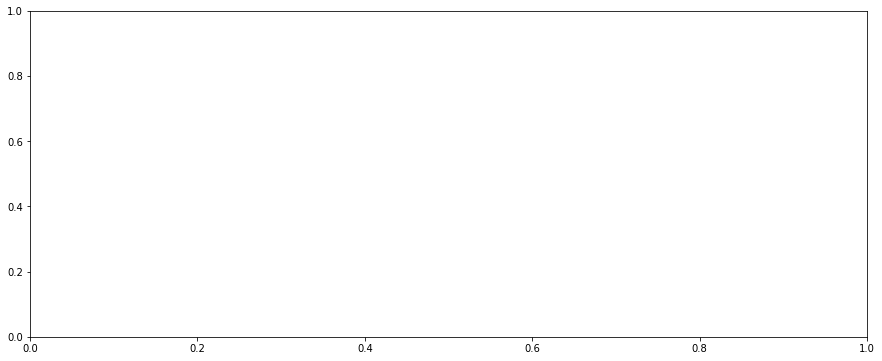

In [16]:
index = np.arange(7)
bar_width = 0.2
push=0.1
ml_labels=["Deep neural network","Random forest","Support Vector Machine"]
fig, ax = plt.subplots(figsize=(15, 6),sharex=True)
ax.bar(index-bar_width+push, dnn_model_score, bar_width,label=ml_labels[0])
ax.bar(index+push, rf_model_score,bar_width, label=ml_labels[1])
ax.bar(index+1*bar_width+push, svm_model_score,bar_width, label=ml_labels[2])

ax.bar(index+6*bar_width, 0,bar_width)
ax.set_ylabel('Werte')
ax.set_title('Auswertungsergebnisse der Modellen')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(config.labels)
ax.legend()
plt.grid(axis = 'y')
xmarks=[0.0,0.5,0.97,1.0]
plt.yticks(xmarks)
plt.savefig('plots/{}'.format("quad_models_muster_scores"), dpi=300)
plt.show()